In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [11]:
import pandas as pd
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)

In [3]:
path = '/content/drive/MyDrive/datasets/weight-height.csv'
df = pd.read_csv(path)

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


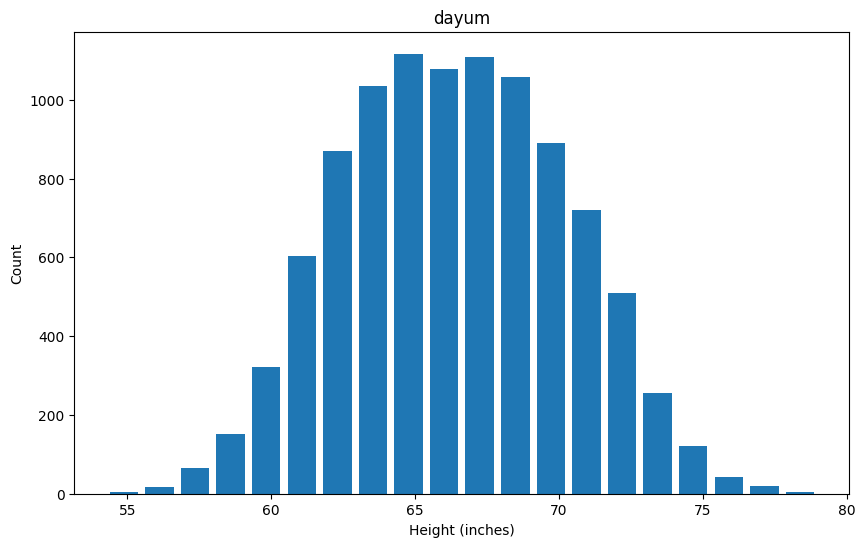

In [9]:
plt.hist(df.Height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.title('dayum')
plt.show()

In [10]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

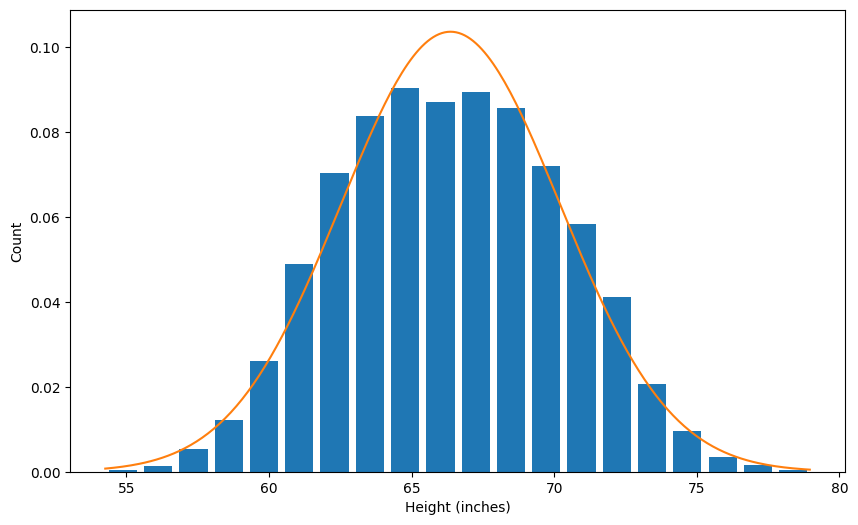

In [12]:
from scipy.stats import norm

plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.Height.mean(), df.Height.std()))


In [13]:
df.Height.mean()

66.36755975482124

In [14]:
df.Height.std()

3.8475281207732293

In [15]:
upper_limit = df.Height.mean()+3*df.Height.std()
upper_limit

77.91014411714093

In [16]:
lower_limit = df.Height.mean()-3*df.Height.std()
lower_limit

54.82497539250156

In [17]:
df[(df.Height > upper_limit) | (df.Height < lower_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [18]:
df_no_outlier = df[(df.Height < upper_limit) & (df.Height > lower_limit)]

In [19]:
df_no_outlier

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [20]:
df_no_outlier.shape

(9993, 3)

In [21]:
df['zscore'] = (df.Height - df.Height.mean())/ df.Height.std()
df.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [22]:
df[df.zscore > 3]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [23]:
df[df.zscore <- 3]

,Gender,Height,Weight,zscore
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [24]:
df_no_outliers = df[(df.zscore > -3) & (df.zscore<3)]
df_no_outliers.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [25]:
path = '/content/drive/MyDrive/datasets/bhp.csv'
df = pd.read_csv(path)
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [29]:
min_thresold, max_thresold = df.price_per_sqft.quantile([0.001, 0.999])
print(f"""min_thresold: {min_thresold}
max_thresold: {max_thresold}
      """)

min_thresold: 1366.184
max_thresold: 50959.36200000098
      


In [30]:
df.shape

(13200, 7)

In [31]:
df2 = df[ (df.price_per_sqft < max_thresold) & (df.price_per_sqft > min_thresold)]
df2.shape

(13172, 7)

In [43]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589432, -9900.429065502582)

In [47]:
df3 = df2[ (df2.price_per_sqft < upper_limit) & (df2.price_per_sqft > lower_limit)]

In [48]:
df3.shape

(13047, 7)

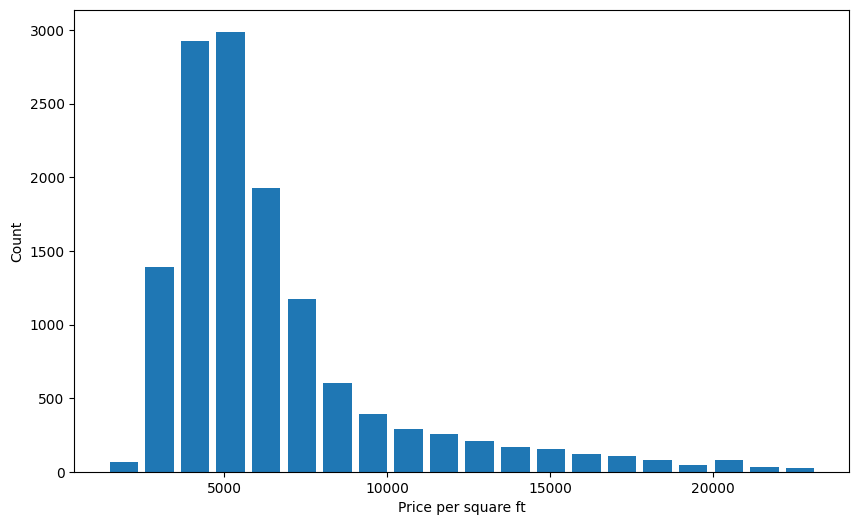

In [49]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

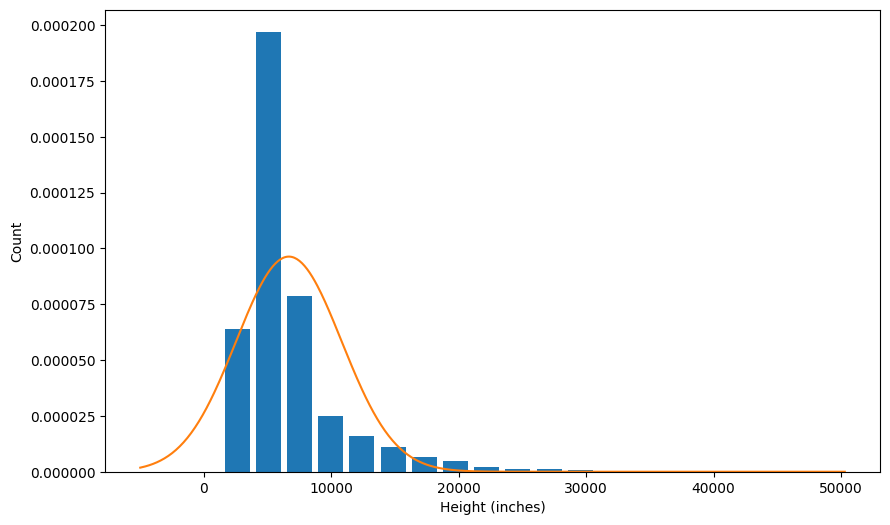

In [52]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

In [50]:
df2.shape

(13172, 7)

In [53]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

<ipython-input-53-70754eb1335e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
1271,Mysore Road,2 BHK,1239.0,2.0,53.0,2,4277,-0.576344
8137,Kadubeesanahalli,2 BHK,1257.0,2.0,93.0,2,7398,0.177335
12751,9th Phase JP Nagar,2 BHK,1050.0,2.0,35.0,2,3333,-0.804307
10043,Ambedkar Nagar,3 BHK,1921.0,4.0,129.0,3,6715,0.012399
12931,Thanisandra,4 BHK,2259.0,3.0,112.0,4,4957,-0.412134
627,Marathahalli,4 BHK,3800.0,4.0,250.0,4,6578,-0.020684
11041,Green Glen Layout,3 BHK,1750.0,3.0,81.0,3,4628,-0.491583
1161,Ambalipura,3 BHK,1390.0,2.0,175.0,3,12589,1.430890
13174,Sultan Palaya,4 BHK,2200.0,3.0,80.0,4,3636,-0.731137
9795,Malleshwaram,1 BHK,620.0,1.0,86.8,1,14000,1.771628


In [55]:
df4 = df2[ (df2.zscore >-4) & (df2.zscore<4)]
df4.shape

(13047, 8)

In [59]:
data = {
    'name': ['mohan', 'maria', 'sakib', 'tao', 'virat', 'khusbu', 'dmitry', 'selena', 'john', 'imran', 'jose', 'deepika', 'yoseph', 'binod', 'gulshan', 'johnson', 'donald', 'aamir', 'ken', 'liu'],
    'height': [1.2, 2.3, 4.9, 5.1, 5.2, 5.4, 5.5, 5.5, 5.6, 5.6, 5.8, 5.9, 6, 6.1, 6.2, 6.5, 7.1, 14.5, 23.2, 40.2]
}

cols = ['name', 'height']

df = pd.DataFrame(data=data, columns=cols)
df.head()

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2


In [60]:
df.describe()

,height
count,20.000000
mean,8.390000
std,8.782812
min,1.200000
25%,5.350000
50%,5.700000
75%,6.275000
max,40.200000


In [61]:
Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)
Q1, Q3

(5.3500000000000005, 6.275)

In [62]:
IQR = Q3 - Q1
IQR

0.9249999999999998

In [63]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(3.962500000000001, 7.6625)

In [64]:
df[ (df.height< lower_limit) | (df.height>upper_limit)]

,name,height
0,mohan,1.2
1,maria,2.3
17,aamir,14.5
18,ken,23.2
19,liu,40.2


In [65]:
df = df[ (df.height > lower_limit) & (df.height < upper_limit)]
df

,name,height
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8
11,deepika,5.9


In [66]:
path = '/content/drive/MyDrive/datasets/weight-height.csv'
df = pd.read_csv(path)

In [67]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


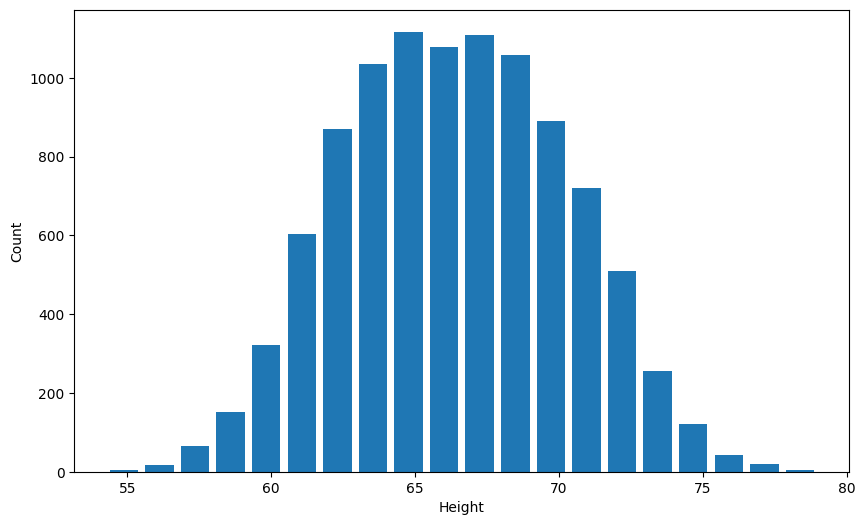

In [68]:
plt.hist(df.Height, bins=20, rwidth=0.8)
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

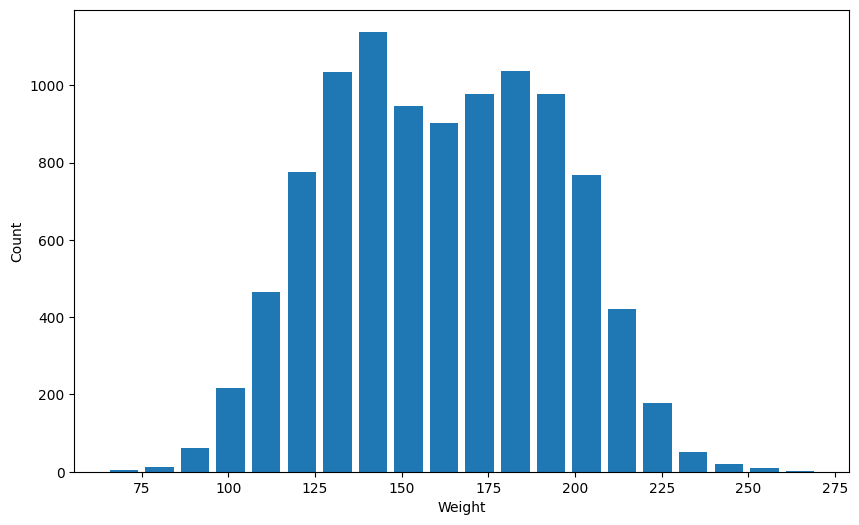

In [69]:
plt.hist(df.Weight, bins=20, rwidth=0.8)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

In [70]:
Q1_h = df.Height.quantile(0.25)
Q3_h = df.Height.quantile(0.75)
Q1_h, Q3_h

(63.505620481218955, 69.1742617268347)

In [72]:
IQR = Q3_h - Q1_h
IQR

5.668641245615746

In [73]:
lower_limit = Q1_h - 1.5*IQR
upper_limit = Q3_h + 1.5*IQR
lower_limit, upper_limit

(55.00265861279534, 77.67722359525831)

In [74]:
df[ (df.Height < lower_limit) | (df.Height > upper_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [76]:
Q1_w = df.Weight.quantile(0.25)
Q3_w = df.Weight.quantile(0.75)
print(f"Q1_w: {Q1_w} Q3_w: {Q3_w}")

IQR = Q3_w - Q1_w
print(f"IQR: {IQR}")

lower_limit = Q1_w - 1.5*IQR
upper_limit = Q3_w + 1.5*IQR
print(f"lower_limit: {lower_limit} upper_limit: {upper_limit}")

df[ (df.Weight < lower_limit) | (df.Weight > upper_limit)]

Q1_w: 135.8180513055015 Q3_w: 187.16952486868348
IQR: 51.35147356318197
lower_limit: 58.79084096072856 upper_limit: 264.19673521345646


,Gender,Height,Weight
2014,Male,78.998742,269.989699
